In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from numpy.linalg import inv

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

In [2]:
X = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
               [3.2, 2.4, 2.4, 0.1, 5.5],
               [10., 8.2, 4.3, 2.6, 0.9]
             ])

In [3]:
np.cov(X)

array([[ 0.115 ,  0.0575, -1.2325],
       [ 0.0575,  3.757 , -0.8775],
       [-1.2325, -0.8775, 14.525 ]])

In [5]:
df = pd.DataFrame(data=[(49, 124), 
                        (69, 95), 
                        (89, 71), 
                        (99, 45),
                        (109, 18),
],
                  columns=['price', 'demand'])
df

,price,demand
0,49,124
1,69,95
2,89,71
3,99,45
4,109,18


In [6]:
df.cov()

,price,demand
price,580.0,-983.0
demand,-983.0,1717.3


In [7]:
df.corr()

,price,demand
price,1.000000,-0.984955
demand,-0.984955,1.000000


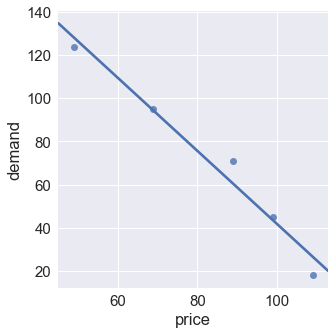

In [8]:
sns.lmplot(x='price', y='demand', data=df, ci=None)

In [9]:
X = df.price.values
X

array([ 49,  69,  89,  99, 109], dtype=int64)

In [10]:
# Adding 1's column
col_values = np.random.uniform(size=(5,1))
col_values

array([[0.08092026],
       [0.83250628],
       [0.29682763],
       [0.32153467],
       [0.09265403]])

In [11]:
n,m = col_values.shape 
col_ones = np.ones((n,1))
col_ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [12]:
Xnew = np.hstack((col_ones, col_values))
Xnew

array([[1.        , 0.08092026],
       [1.        , 0.83250628],
       [1.        , 0.29682763],
       [1.        , 0.32153467],
       [1.        , 0.09265403]])

In [14]:
X = X.reshape((len(X), 1))
X

array([[ 49],
       [ 69],
       [ 89],
       [ 99],
       [109]], dtype=int64)

In [15]:
n,m = X.shape 
col_ones = np.ones((n,1))
col_ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [16]:
Xnew = np.hstack((col_ones, X))
Xnew

array([[  1.,  49.],
       [  1.,  69.],
       [  1.,  89.],
       [  1.,  99.],
       [  1., 109.]])

In [17]:
X_transpose = Xnew.T
X_transpose

array([[  1.,   1.,   1.,   1.,   1.],
       [ 49.,  69.,  89.,  99., 109.]])

In [18]:
y = df.demand.values
y

array([124,  95,  71,  45,  18], dtype=int64)

In [19]:
y = y.reshape((len(X), 1))
y

array([[124],
       [ 95],
       [ 71],
       [ 45],
       [ 18]], dtype=int64)

In [20]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [21]:
# Linear Equation in matrix form is
# Y = BX + E

In [20]:
# Solution is 
# B = (XT.X)-1 . XTY

In [22]:
# find the coeff matrix, B

np.dot(X_transpose, Xnew)

array([[5.0000e+00, 4.1500e+02],
       [4.1500e+02, 3.6765e+04]])

In [23]:
a = np.array([[1., 2.], [3., 4.]])
a

array([[1., 2.],
       [3., 4.]])

In [24]:
ainv = inv(a)
ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [25]:
part1 = inv(np.dot(X_transpose, Xnew))
part1

array([[ 3.16939655e+00, -3.57758621e-02],
       [-3.57758621e-02,  4.31034483e-04]])

In [26]:
part2 = np.dot(X_transpose, y)
part2

array([[  353.],
       [25367.]])

In [27]:
B = np.dot(part1, part2)
B

array([[211.27068966],
       [ -1.69482759]])

In [28]:
# f(x) = 211 -1.7X

In [29]:
# SSE 
df

,price,demand
0,49,124
1,69,95
2,89,71
3,99,45
4,109,18


In [30]:
df['fx'] = 211 + (-1.7) * df['price']
df['error'] = df['demand'] - df['fx']
df['error(sq)'] = df['error'] * df['error']
df

,price,demand,fx,error,error(sq)
0,49,124,127.7,-3.7,13.69
1,69,95,93.7,1.3,1.69
2,89,71,59.7,11.3,127.69
3,99,45,42.7,2.3,5.29
4,109,18,25.7,-7.7,59.29


In [31]:
df['error(sq)'].sum()

207.6499999999998

In [32]:
E = df['error'].values
print(E)
E = E.reshape(len(E), 1)
print(E)

[ -3.7   1.3  11.3   2.3  -7.7]
[[ -3.7]
 [  1.3]
 [ 11.3]
 [  2.3]
 [ -7.7]]


In [74]:
SSE = np.dot(E.T, E)
SSE

array([[ 207.65]])